# Notebook, mise en place des labels

In [1]:
import geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

In [2]:
import os 
os.chdir("..")
wd=os.getcwd()
wd

'C:\\Users\\morga\\Documents\\GitHub\\satellite_imagery'

### La ville de Ez Zor

In [3]:
from zipfile import ZipFile
zip = ZipFile(wd+'\\data\\UNITAR_data\\CE20130604SYR_Raqqa_Deir_shp.zip')
zip.extractall('temp') # Enlever le fichier temp à la fin ca entre pas dans le git : // 

In [4]:
data_ezzor=gpd.read_file('temp\Damage_Sites_Deir_ez_Zor_CDA.shp')

On ne garde que les dernières observation qui datent de 2017. 

In [5]:
data_ezzor=data_ezzor[['SiteID','SensDt5','SensId5','ConfId5','DaSitCl5','Damst5','GrDaCl','FieldVl','Neigh','Code','geometry']]

In [6]:
data_ezzor

,SiteID,SensDt5,SensId5,ConfId5,DaSitCl5,Damst5,GrDaCl,FieldVl,Neigh,Code,geometry
0,Building (General / Default),2017-11-09,Worldview-2,Medium,Destroyed,No change,Damaged Buildings,Not yet field validated,Al Jami Al Kabeer wa Al Wasat,CE20130604SYR,POINT (40.13379 35.34347)
1,Building (General / Default),2017-11-09,Worldview-2,Medium,No Visible Damage,No change,Damaged Buildings,Not yet field validated,Qosour,CE20130604SYR,POINT (40.13147 35.34176)
2,Building (General / Default),2017-11-09,Worldview-2,Uncertain,Moderate Damage,No change,Damaged Buildings,Not yet field validated,Qosour,CE20130604SYR,POINT (40.12980 35.34216)
3,Building (General / Default),2017-11-09,Worldview-2,Medium,No Visible Damage,No change,Damaged Buildings,Not yet field validated,Qosour,CE20130604SYR,POINT (40.12923 35.34227)
4,Building (General / Default),2017-11-09,Worldview-2,Very High,Destroyed,No change,Damaged Buildings,Not yet field validated,Shuhuda,CE20130604SYR,POINT (40.13174 35.33072)
...,...,...,...,...,...,...,...,...,...,...,...
7037,Road,2017-11-09,Worldview-2,Very High,Impact Crater (Damage to Road),New - damage,Impacts on Roads / Bridges,Not yet field validated,Maysalun,CE20130604SYR,POINT (40.14549 35.32312)
7038,Road,2017-11-09,Worldview-2,Medium,Moderate Damage,New - damage,Damaged Road segments,Not yet field validated,Maysalun,CE20130604SYR,POINT (40.14631 35.32267)
7039,Road,2017-11-09,Worldview-2,Very High,Impact Crater (Damage to Road),New - damage,Impacts on Roads / Bridges,Not yet field validated,Shuhuda,CE20130604SYR,POINT (40.13676 35.32850)
7040,Road,2017-11-09,Worldview-2,Medium,Moderate Damage,New - damage,Damaged Road segments,Not yet field validated,Maysalun,CE20130604SYR,POINT (40.15772 35.31770)


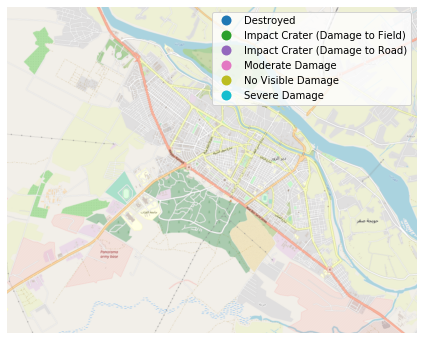

In [7]:
ax = geoplot.webmap(data_ezzor, projection=gcrs.WebMercator())
data_ezzor.plot(column='DaSitCl5',legend=True,ax=ax)
plt.show() #Marche pas ? 

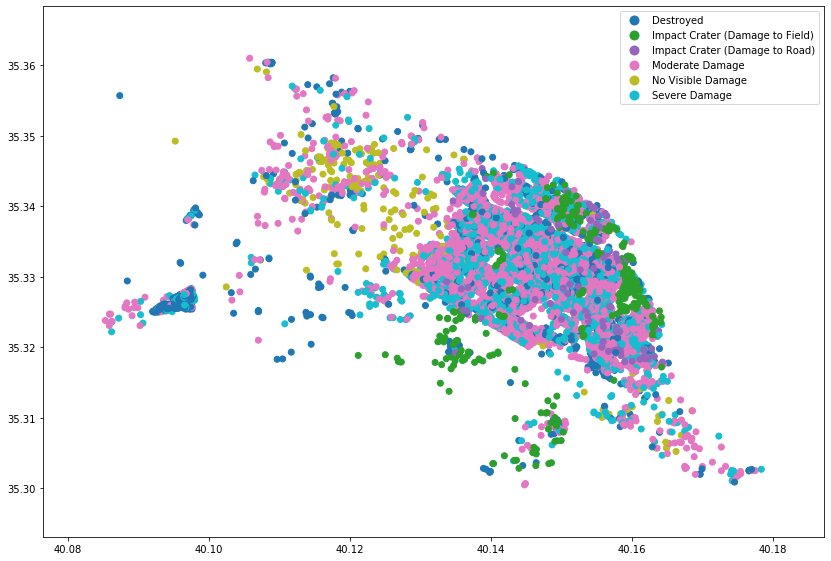

In [8]:
data_ezzor.plot(column='DaSitCl5',legend=True,figsize=(14,14))
plt.show()

In [9]:
latitude=[]
longitude=[]
for l in data_ezzor.geometry:
    latitude.append(l.x)
    longitude.append(l.x)

In [10]:
av_lat = sum(latitude) / len(latitude) 
av_long = sum(longitude) / len(longitude) 

Pour monter notre premier modèle on va construire des labels 1=détruit et 0=non-détruit. Pour commencer je vais prendre tous les points 'détruits' peu importe si il s'agit d'un building, d'un cratère sur la route ou d'un cratère dans un champ. 
A discuter avec les garçons. 

In [11]:
labels = data_ezzor['DaSitCl5'].astype('category').cat.categories.tolist()
labels

['Destroyed',
 'Impact Crater (Damage to Field)',
 'Impact Crater (Damage to Road)',
 'Moderate Damage',
 'No Visible Damage',
 'Severe Damage']

In [12]:
def coding(x):
    if x=='Destroyed':
        return 1
    if x=='Severe Damage':
        return 1
    if x=='Impact Crater (Damage to Field)':
        return 1
    if x=='Impact Crater (Damage to Road)':
        return 1
    if x=='Moderate Damage':
        return 0
    if x=='No Visible Damage':
        return 0
    else:
        return 0 

In [16]:
data_ezzor['label']=data_ezzor['DaSitCl5'].apply(coding)

In [17]:
data_ezzor

,SiteID,SensDt5,SensId5,ConfId5,DaSitCl5,Damst5,GrDaCl,FieldVl,Neigh,Code,geometry,label
0,Building (General / Default),2017-11-09,Worldview-2,Medium,Destroyed,No change,Damaged Buildings,Not yet field validated,Al Jami Al Kabeer wa Al Wasat,CE20130604SYR,POINT (40.13379 35.34347),1
1,Building (General / Default),2017-11-09,Worldview-2,Medium,No Visible Damage,No change,Damaged Buildings,Not yet field validated,Qosour,CE20130604SYR,POINT (40.13147 35.34176),0
2,Building (General / Default),2017-11-09,Worldview-2,Uncertain,Moderate Damage,No change,Damaged Buildings,Not yet field validated,Qosour,CE20130604SYR,POINT (40.12980 35.34216),0
3,Building (General / Default),2017-11-09,Worldview-2,Medium,No Visible Damage,No change,Damaged Buildings,Not yet field validated,Qosour,CE20130604SYR,POINT (40.12923 35.34227),0
4,Building (General / Default),2017-11-09,Worldview-2,Very High,Destroyed,No change,Damaged Buildings,Not yet field validated,Shuhuda,CE20130604SYR,POINT (40.13174 35.33072),1
...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Road,2017-11-09,Worldview-2,Very High,Impact Crater (Damage to Road),New - damage,Impacts on Roads / Bridges,Not yet field validated,Maysalun,CE20130604SYR,POINT (40.14549 35.32312),1
7038,Road,2017-11-09,Worldview-2,Medium,Moderate Damage,New - damage,Damaged Road segments,Not yet field validated,Maysalun,CE20130604SYR,POINT (40.14631 35.32267),0
7039,Road,2017-11-09,Worldview-2,Very High,Impact Crater (Damage to Road),New - damage,Impacts on Roads / Bridges,Not yet field validated,Shuhuda,CE20130604SYR,POINT (40.13676 35.32850),1
7040,Road,2017-11-09,Worldview-2,Medium,Moderate Damage,New - damage,Damaged Road segments,Not yet field validated,Maysalun,CE20130604SYR,POINT (40.15772 35.31770),0


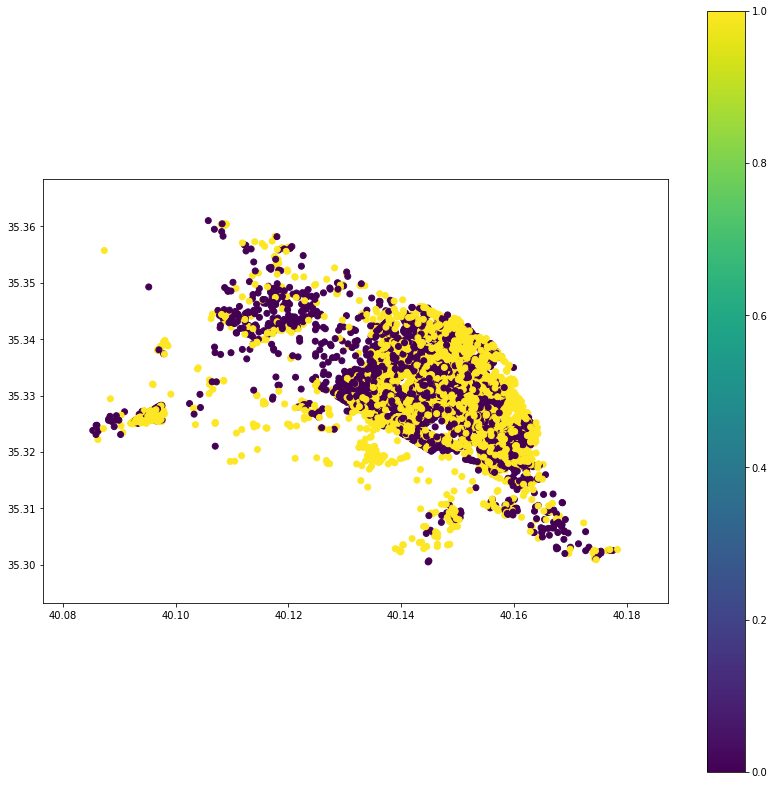

In [20]:
data_ezzor.plot(column='label',legend=True,figsize=(14,14))
plt.show()

In [22]:
data_ezzor.label.mean() # A peu près moitié-moitié 

0.5583641011076399

In [25]:
print('{} observations positive, {} observations négatives'.format(len(data_ezzor[data_ezzor.label==1]),len(data_ezzor[data_ezzor.label==0])))

3932 observations positive, 3110 observations négatives


In [27]:
data_label_ezzor=data_ezzor[['label','geometry']]

In [ ]:
sav.to_csv